In [22]:
import sys,os
import pandas as pd
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt

# Data service path
ds_folder = os.path.join(str(Path.home()),'src/lri-wgms-data-service')
if ds_folder not in sys.path:
    sys.path.insert(0, ds_folder)
from DataService import DataService



In [25]:
tw = 4
vnam = 'sv3-1103'


# --------------------------------------------------------
# Set start date according to the time window to be considered
now = datetime.utcnow()
if tw is not None:
    # use specified time window
    tst = now - pd.Timedelta(days=float(tw))
else:
    # use last 7 days
    tst = now - pd.Timedelta(days=7)
# # Read in Power status from Data Portal
# pwrDPdf = readDP_AMPSPowerStatusSummary(vid=vid, start_date=tst.strftime("%Y-%m-%dT%H:%M:%S.000Z"))


In [20]:

# instantiate data-service object
ds = DataService()
# To get report names
# ds.report_list
# Get report
start_date = tst.strftime("%Y-%m-%dT%H:%M:%S.000Z")
end_date = now.strftime("%Y-%m-%dT%H:%M:%S.000Z")
out = ds.get_report_data('Amps Power Summary Report', start_date, end_date, [vnam])


pwrDPdf = pd.json_normalize(out['report_data'][0]['vehicle_data']['recordData'])
# set timeStamp column as datetimeindex
pwrDPdf = pwrDPdf.set_index(pd.DatetimeIndex(pwrDPdf['gliderTimeStamp'].values))
pwrDPdf.drop(columns=['gliderTimeStamp'], inplace=True)
# sort index
pwrDPdf.sort_index(inplace=True)

pwrDPdf


,vehicleName,gliderLatitude,gliderLongitude,gliderTaskAddress,gliderBoardAddress,reportFormatVersion,totalBatteryPower,solarPowerGenerated,outputPortPower,batteryChargingPower,batteryChargingCurrent,recordData
2022-08-04 18:11:35,SV3-1103 - DOD,32.869732,-117.252348,0,0,1,2776741,0.0,7563.0,-11,0,01A55E2A00000000008B1D0000F5FFFFFF000000001501...
2022-08-04 19:11:35,SV3-1103 - DOD,32.869923,-117.252250,0,0,1,2772114,12743.0,9608.0,-9,0,01924C2A00C731000088250000F7FFFFFF000000001501...
2022-08-04 20:11:35,SV3-1103 - DOD,32.869922,-117.252395,0,0,1,2765720,3315.0,9496.0,-9369,-570,0198332A00F30C00001825000067DBFFFFC6FDFFFF1501...
2022-08-04 21:11:35,SV3-1103 - DOD,32.867035,-117.257377,0,0,1,2760855,4744.0,8917.0,-8,0,0197202A0088120000D5220000F8FFFFFF000000001501...
2022-08-04 22:11:35,SV3-1103 - DOD,32.867042,-117.257395,0,0,1,2760624,6782.0,11129.0,-10,0,01B01F2A007E1A0000792B0000F6FFFFFF000000001501...
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-08 13:05:19,SV3-1103 - DOD,32.939588,-117.321503,0,0,1,2321872,86.0,30509.0,-52629,-3286,01D06D2300560000002D7700006B32FFFF2AF3FFFF1501...
2022-08-08 14:05:19,SV3-1103 - DOD,32.925255,-117.323303,0,0,1,2284920,15497.0,63184.0,-23195,-1452,0178DD2200893C0000D0F6000065A5FFFF54FAFFFF1501...
2022-08-08 15:05:19,SV3-1103 - DOD,32.913852,-117.320693,0,0,1,2265439,16447.0,32442.0,-21458,-1346,015F9122003F400000BA7E00002EACFFFFBEFAFFFF1501...
2022-08-08 16:05:19,SV3-1103 - DOD,32.922767,-117.321998,0,0,1,2272480,66054.0,61154.0,540,31,01E0AC220006020100E2EE00001C0200001F0000001501...


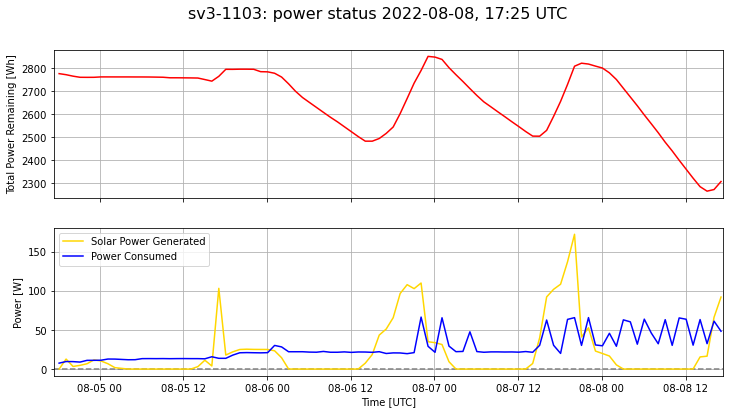

In [28]:
# Plot
labsz = 8
fntsz = 10
tL = [tst, now]
fig, ax = plt.subplots(2,1,figsize=(12, 6),sharex=True)
# totalBatteryPower
ax[0].plot(pwrDPdf['totalBatteryPower']/1000,'-r')
ax[0].set_ylabel('Total Power Remaining [Wh]', fontsize=fntsz)
# Power in/out
ax[1].plot(tL,[0,0],'--',color='gray')
l2,=ax[1].plot(pwrDPdf['solarPowerGenerated']/1000,'-',color='gold',label='Solar Power Generated')
l3,=ax[1].plot(pwrDPdf['outputPortPower']/1000,'-b',label='Power Consumed')
ax[1].legend(fontsize=fntsz)
# ax[1].legend((l1,l2,l3),('Battery Charging Power','Solar Power Generated','Power Consumed'), fontsize=fntsz)
ax[1].set_ylabel('Power [W]', fontsize=fntsz)
ax[1].set_xlabel('Time [UTC]', fontsize=fntsz)
ax[1].set_xlim(tL[0],tL[-1])

# tmstmp = date.today().strftime('%Y-%m-%d')
tmstmp = now.strftime('%Y-%m-%d, %H:%M UTC')
fig.suptitle(vnam + ': power status ' + tmstmp, fontsize=16)

# add grid lines
ax = fig.get_axes()
for axi in ax:
    axi.grid()
# fig.show()